<a href="https://colab.research.google.com/github/LunaOh/MachineLearning/blob/main/%E1%84%86%E1%85%A1%E1%84%85%E1%85%B3%E1%86%AB%E1%84%8F%E1%85%A9%E1%86%BC_%E1%84%8B%E1%85%B4%E1%84%89%E1%85%A1%E1%84%80%E1%85%A7%E1%86%AF%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%82%E1%85%A1%E1%84%86%E1%85%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz # tree 시각화
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('/content/drive/MyDrive/기계학습/Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.isnull().any().any()

False

In [7]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

<Axes: xlabel='Class', ylabel='count'>

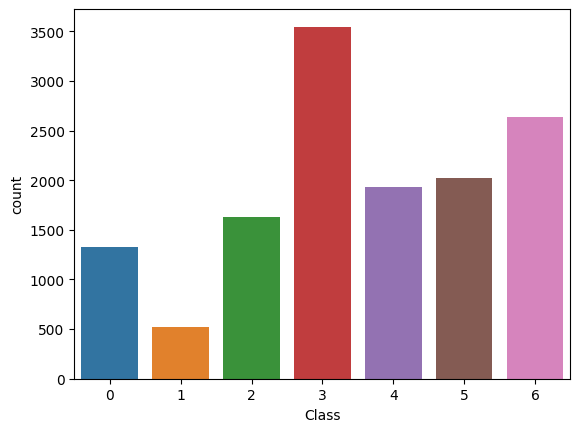

In [9]:
import seaborn as sns
sns.countplot(data=df,x='Class')

In [10]:
y = df['Class']
x = df.drop('Class',axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=2023)

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=2023)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# 오버샘플링 이후의 클래스 분포 확인
print("오버샘플링 이전의 클래스 분포: ", y_train.value_counts())
print("오버샘플링 이후의 클래스 분포: ", y_train_resampled.value_counts())

오버샘플링 이전의 클래스 분포:  3    1066
6     794
5     603
4     586
2     507
0     381
1     146
Name: Class, dtype: int64
오버샘플링 이후의 클래스 분포:  0    1066
6    1066
3    1066
5    1066
2    1066
1    1066
4    1066
Name: Class, dtype: int64


In [13]:
dt_clf = DecisionTreeClassifier(random_state=2023)
dt_clf.fit(x_train_resampled, y_train_resampled) 

DecisionTreeClassifier(random_state=2023)

In [14]:
max_depth = dt_clf.tree_.max_depth
print('Tree depth:', max_depth)

Tree depth: 21


In [15]:
feature_names = x.columns
class_names = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']

In [16]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = class_names, feature_names = feature_names, impurity=True, filled=True)

In [17]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
dt = graphviz.Source(dot_graph)
dt.render(filename='dt_notprun', directory='/content/drive/MyDrive/기계학습', format='png')

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


'/content/drive/MyDrive/기계학습/dt_notprun.png'

In [18]:
y_pred = dt_clf.predict(x_test) 

In [19]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train_resampled, y_train_resampled), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='macro')
precision = mt.precision_score(y_test, y_pred, average='macro')
f1_score = mt.f1_score(y_test, y_pred, average='macro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.8903232577665827 

Accuracy:  0.89 

Recall:  0.91 

Precision:  0.90 

F1_score:  0.90 

Confusion Matrix: 
 [[ 815    0   71    0    7   20   28]
 [   2  374    0    0    0    0    0]
 [  57    0 1030    0   17    6   13]
 [   0    0    0 2210    9   70  191]
 [  13    0   39   23 1231    0   36]
 [  14    0    1   21    2 1359   27]
 [  13    0   10  231   55   69 1464]]


In [20]:
scores = cross_val_score(dt_clf, x, y, cv = 10)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.6883574960538


In [21]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =10))

,fit_time,score_time,test_score
0,0.273494,0.002654,0.454479
1,0.331412,0.003572,0.734754
2,0.332893,0.002695,0.747979
3,0.322498,0.002661,0.809699
4,0.319486,0.002630,0.936811
5,0.309434,0.002681,0.795738
6,0.306091,0.002884,0.713446
7,0.314858,0.002745,0.708303
8,0.326139,0.002779,0.653931
9,0.314025,0.002868,0.328435


In [22]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.8903232577665827

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state=2023)

params = {
    'max_depth': [7,8,9,10]#,
    #'min_samples_split': [4,5,6,7,8],
    #'min_samples_leaf': [4,5,6,7,8]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)

grid_cv.fit(x_train, y_train)

# 최적의 하이퍼파라미터 조합
print("최적의 하이퍼파라미터: ", grid_cv.best_params_)
print("최고 예측 정확도: ", grid_cv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 하이퍼파라미터:  {'max_depth': 9}
최고 예측 정확도:  0.9012968896248831


In [24]:
pruned_dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7, random_state=2023) 
pruned_dt_clf .fit(x_train_resampled, y_train_resampled) 

print("Accuracy of training set: {:.3f}".format(pruned_dt_clf.score(x_train_resampled, y_train_resampled)))
print("Accuracy of test set: {:.3f}".format(pruned_dt_clf.score(x_test, y_test)))


from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = pruned_dt_clf.predict(x_test)

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print('Precision: {:.3f}'.format(precision))
print('Recall: {:.3f}'.format(recall))
print('F1-score: {:.3f}'.format(f1))
print('Confusion Matrix:\n', conf_matrix)

Accuracy of training set: 0.969
Accuracy of test set: 0.906
Precision: 0.920
Recall: 0.920
F1-score: 0.919
Confusion Matrix:
 [[ 834    0   65    0    5   12   25]
 [   0  376    0    0    0    0    0]
 [  49    0 1040    0   14    3   17]
 [   0    0    0 2237    3   63  177]
 [   6    0   40   20 1250    0   26]
 [  16    0    0   27    0 1358   23]
 [  15    0    5  205   42   33 1542]]


In [25]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", class_names = class_names, feature_names = feature_names, impurity=True, filled=True)

In [26]:
print('[ max_depth가 10인 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("prunedtree.dot") as f:
    dot_graph = f.read()
gra=graphviz.Source(dot_graph)

[ max_depth가 10인 경우의 Decision Tree 시각화 ]


In [27]:
gra.render(filename='prun_img', directory='/content/drive/MyDrive/기계학습', format='png')

'/content/drive/MyDrive/기계학습/prun_img.png'

In [28]:
import numpy as np
importances = pruned_dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance ranking:")
for f in range(x_train_resampled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature importance ranking:
1. feature 12 (0.333105)
2. feature 2 (0.153507)
3. feature 5 (0.134182)
4. feature 1 (0.117437)
5. feature 11 (0.100046)
6. feature 10 (0.093145)
7. feature 15 (0.020138)
8. feature 14 (0.010540)
9. feature 3 (0.009607)
10. feature 9 (0.007872)
11. feature 4 (0.005933)
12. feature 8 (0.005610)
13. feature 13 (0.004927)
14. feature 7 (0.002731)
15. feature 0 (0.000803)
16. feature 6 (0.000418)


In [29]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.tree import DecisionTreeClassifier, export_text

# 부분 의사결정나무 시각화
tree_rules = export_text(pruned_dt_clf, feature_names=list(x_train_resampled.columns))
print(tree_rules)

|--- ShapeFactor1 <= 0.00
|   |--- Area <= 126060.50
|   |   |--- class: 1
|   |--- Area >  126060.50
|   |   |--- class: 1
|--- ShapeFactor1 >  0.00
|   |--- MajorAxisLength <= 323.89
|   |   |--- Eccentricity <= 0.67
|   |   |   |--- ShapeFactor1 <= 0.01
|   |   |   |   |--- Perimeter <= 896.69
|   |   |   |   |   |--- ShapeFactor4 <= 1.00
|   |   |   |   |   |   |--- ShapeFactor3 <= 0.75
|   |   |   |   |   |   |   |--- AspectRation <= 1.34
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- AspectRation >  1.34
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- ShapeFactor3 >  0.75
|   |   |   |   |   |   |   |--- EquivDiameter <= 212.87
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- EquivDiameter >  212.87
|   |   |   |   |   |   |   |   |--- ShapeFactor4 <= 1.00
|   |   |   |   |   |   |   |   |   |--- EquivDiameter <= 219.37
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |  

In [31]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.6 MB/s eta 0:00:00


In [32]:
import shap

# explain the model's predictions using SHAP values
explainer = shap.Explainer(pruned_dt_clf.predict, x_train_resampled)
shap_values = explainer(x_test)

Permutation explainer: 9529it [07:01, 22.56it/s]


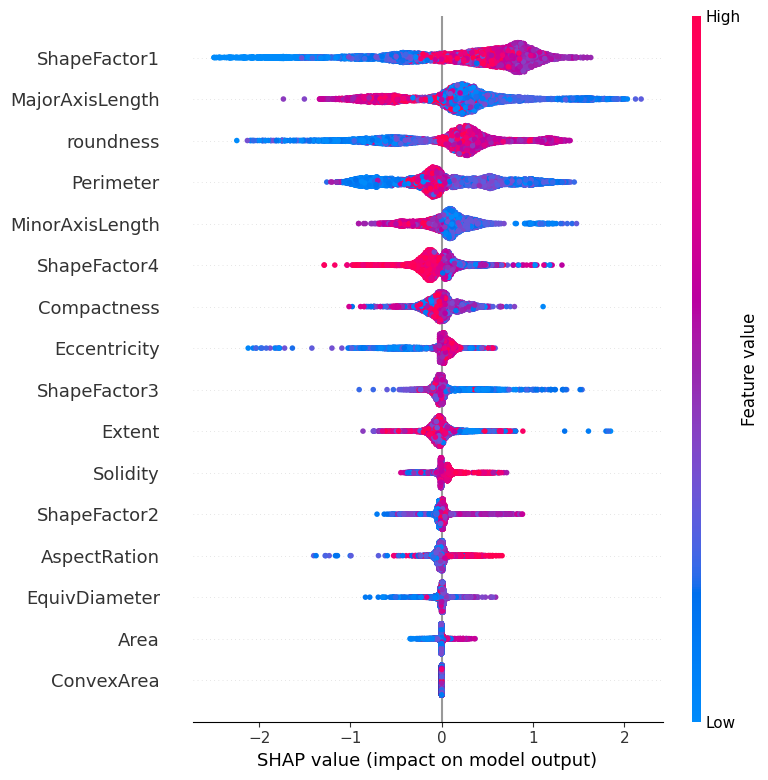

In [33]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.summary_plot(shap_values, x_test)